In [153]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd

#machine learning libraries 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_error,explained_variance_score
from sklearn.utils import resample
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.decomposition import PCA
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture

#datasets 
from sklearn.datasets import fetch_lfw_people, load_digits

# Regression

 linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable.

## Simple linear regression
We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form
𝑦=𝑎𝑥+𝑏 
where  𝑎  is commonly known as the slope, and  𝑏  is commonly known as the intercept.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

## <font color='teal'> 1. Use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line</font>

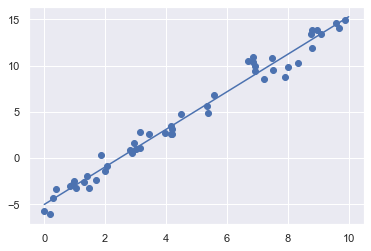

In [5]:
model = LinearRegression(fit_intercept=True)

model.fit(None, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(None)

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Polynomial basis functions

As explained in the lecture polynomial basis functions are capable to transform your data into a space where the basis are polynomial functions. For example, the [Monomial Basis](https://en.wikipedia.org/wiki/Monomial_basis). The monomials form a basis because every polynomial may be uniquely written as a finite linear combination of monomials (this is an immediate consequence of the definition of a polynomial). Therefore, we can recreate every polynom as a linear function.

In the folowing example, you'll see how a polynom can be decomposed by it's features. the transformer will convert the one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression. It can be understood as the projection of the function into each basis vector.



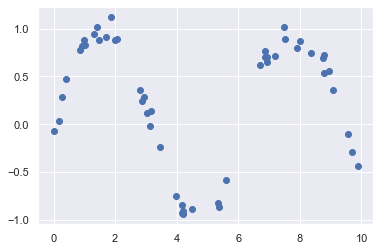

array([[4.17022005e+00, 1.73907352e+01, 7.25231927e+01],
       [7.20324493e+00, 5.18867376e+01, 3.73752880e+02],
       [1.14374817e-03, 1.30815988e-06, 1.49620548e-09],
       [3.02332573e+00, 9.14049845e+00, 2.76347041e+01],
       [1.46755891e+00, 2.15372915e+00, 3.16072440e+00],
       [9.23385948e-01, 8.52641608e-01, 7.87317280e-01],
       [1.86260211e+00, 3.46928663e+00, 6.46190062e+00],
       [3.45560727e+00, 1.19412216e+01, 4.12641722e+01],
       [3.96767474e+00, 1.57424429e+01, 6.24608929e+01],
       [5.38816734e+00, 2.90323473e+01, 1.56431145e+02],
       [4.19194514e+00, 1.75724041e+01, 7.36625540e+01],
       [6.85219500e+00, 4.69525764e+01, 3.21728209e+02],
       [2.04452250e+00, 4.18007224e+00, 8.54625174e+00],
       [8.78117436e+00, 7.71090232e+01, 6.77107778e+02],
       [2.73875932e-01, 7.50080261e-02, 2.05428931e-02],
       [6.70467510e+00, 4.49526682e+01, 3.01393035e+02],
       [4.17304802e+00, 1.74143298e+01, 7.26708346e+01],
       [5.58689828e+00, 3.12134

In [11]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)
plt.show()
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

## <font color='teal'> 2. Create a pipeline to fit a sine wave with noise through the use of 7th-order polynomial basis functions </font>

Usually in machine learning before you fit a model, you'll need to preprocess your data several times before is ready to plug into your model. Using pipelines reduce the amount of times you plug your data into the next step, and provides you an easy way to plug raw data into a trained model. Change <font color='green'>None</font> to make your model work.

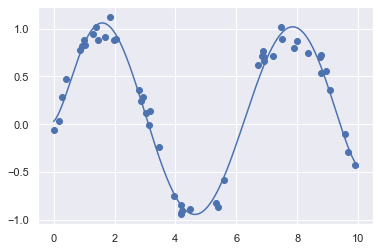

In [15]:
poly_model = make_pipeline(None)
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(None)
yfit = None

plt.scatter(x, y)
plt.plot(xfit, yfit)

## Gaussian basis functions

One of the most useful basis functions is to assume that your data is composed by the sum of multiple gaussian functions, (kind of similar to the clustering algorithm of GMM) 

## <font color='teal'> 3. Complete the function to fit your data with Gaussian basis functions and obtain a MAE lower than 0.05 </font>

Now we will dive a little bit further into the definition of a model using python, we will define the functions for our model object and test how it works to fit our same distribution. Change <font color='green'>None</font> to make your model work.

MAE of 0.04465638345956947


(0.0, 10.0)

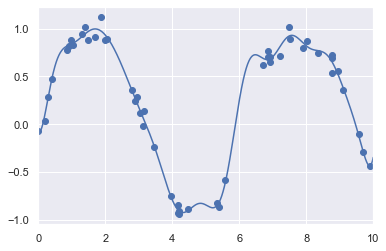

In [28]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = None #Initialize your features 
        self.width_factor =  None #Initialize your features 
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(None) #Return a gaussian function, using arg as the argument of the function.  
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(None,None,None, axis=1) #plug the computed values.
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
ypred = gauss_model.predict(x[:, np.newaxis])

print("MAE of {}".format(mean_absolute_error(y,ypred)))

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

## Predicting Bicycle Traffic
You'll predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors. We will use the data from [Fremont Bridge Bicycle Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k) and [NOAA](https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND). For NOAA data use the closest station to the bridge that has the ID USW00024233. Remember to use the same date range for both datasets, to join them without problems. I used 2012-10-03 to 2021-11-30

## <font color='teal'> 4. Predict with at least 80% accuracy the number of bicycle trips across Seattle's Fremont Bridge  </font>

 Dowload both datasets and place them into your notebook's directory, use the date column as the index. In this way pandas will allow you to treat them as timeseries and sampling will be easy.

In [105]:
counts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('2828005.csv', index_col='DATE', parse_dates=True)

### <font color='teal'> 4.1 Sample your count data into the total count per day </font>

Pandas allows you to resample based on periods of time, them you can use functions to aggregate your data as .sum(),.mean(), .count(), among others

In [106]:
daily = counts.resample('####').sum() #Change the period to days
daily['Total'] = daily.sum(axis=None) # Sum across all columns to reduce it into the total count.
daily = daily[['####']] # remove other columns

Now we will add a label of the date for every value in the dataframe

In [107]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

Then we will take into account too the holiday data, given that the variation of flows will be affected by this

In [108]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2021')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

### <font color='teal'> 4.2 Create a function that computes the hours of daylight for every date </font>

The variation of hours of light will depend on the latitude of every region, use the [standard astronomical calculation](https://en.wikipedia.org/wiki/Sunrise_equation) to add this information. **Remember to convert the axis and latitude values to radians, and to convert the numerator of f to degrees**

$$m =\left(1-tan(latitude)\cdot tan\left(axis \cdot cos( \frac{days 2\pi}{365.25})\right)\right)$$
$$f =degrees(arccos(1 - m)) / 180.$$

(8.0, 17.0)

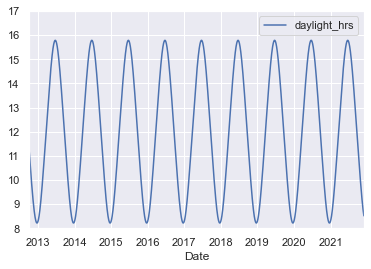

In [109]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (None - pd.datetime(2000, 12, 21)).days ##Number of days since Jan 1st, 2000 12:00.
    m = None
    f=None
    return 24. * f

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

### <font color='teal'> 4.3 Convert temperatures to degrees and join the wheater dataset </font>

[Join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) is one of the most useful functions in pandas, usually tables and datasets can be joined based on a value, this value is set to index. Then pandas will make the hard work to join them. 

In [125]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= None #convert to C
weather['TMAX'] /= None #convert to C
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(None)# join the wheather dataset
                        #with an inner join based on date, use 
                        #the colums ['PRCP', 'Temp (C)', 'dry day']
daily['annual'] = (daily.index - daily.index[0]).days / 365. # add a value to the year percentage


In [126]:
daily.head()# let's display the values

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.000560,1,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,0.000565,1,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,0.000595,1,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,0.000605,1,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,0.000605,1,0.010959


### <font color='teal'> 4.4 Create a linear model and predict the number of bycicles in the bridge </font>

Create a linear model using the following variables ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual'] to predict total number of bicicle counts.
                
                
Your model must have a score greater than 50%

In [113]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = None #choos the x variables 
X = daily[column_names]
y = daily['Total']

model = None #create the model, do not fit the intercept
model.fit(X, y)
daily['predicted'] = model.predict(X)

<AxesSubplot:xlabel='Date'>

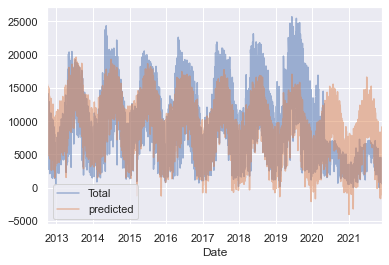

In [114]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [115]:
print("Explained variance score of {} %".format(float(explained_variance_score(daily[['Total']],daily[['predicted']]))*100))

explained variance score of 59.83942096407291 %


### <font color='teal'> 4.4 Drop the values after the COVID pandemic started and obtain a score greater than 80%</font>

The impact of COVID was hardcore, but our model cannot predict it. Erase the data after the pandemic started to increase our model performance

In [116]:
# Drop any rows with null values
daily=daily.loc['Initial date':'End date'] # Chose the date range 

column_names = None
X = daily[column_names]
y = daily['Total']

model = None 
model.fit(X, y)
daily['predicted'] = model.predict(X) #train and predict again 

<AxesSubplot:xlabel='Date'>

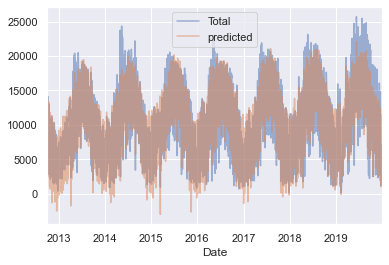

In [117]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [118]:
print("explained variance score of {} %".format(float(explained_variance_score(daily[['Total']],daily[['predicted']]))*100))

explained variance score of 85.15103674977563 %


# Classification

## <font color='teal'> 5. Predict the name of the president from a photograph using SVM </font>

Get the dataset from the sklearn collection of datasets

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


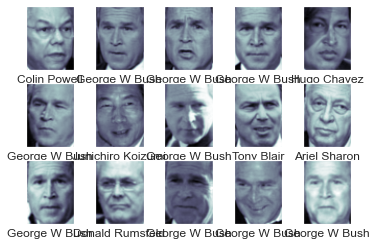

In [130]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### <font color='teal'> 5.1 Create a pipeline using PCA and SVM </font>
[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) is a really good method to reduce the dimensionality of your dataset, and find the key futures that display your model variance. However, we will just use it, but if you feel intereseted dive in with this [article](https://towardsdatascience.com/comprehensive-guide-for-principal-component-analysis-7bf2b4a048ae)
Then, create a support vector classifier based on a [Radial basis function kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel). Also as the datasets is not balanced, it means that there are more images for some presidents as G.W Bush, we need to add weights to each class, then use the a “balanced” mode. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [133]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = None
model = make_pipeline(pca, svc)

### <font color='teal'> 5.2 Split your data between train and test</font>
use the faces datasets which haves attributes data and target, for this you can use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn.

In [136]:
Xtrain, Xtest, ytrain, ytest = None

### <font color='teal'> 5.3 Use Gridsearch to train and find the best model</font>
[Grid-search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.
Gridsearch performs an exhaustive search over specified parameter values for an estimator. Grid search builds a model for every combination of hyperparameters specified and evaluates each model.

In [138]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = None

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 51s, sys: 1min 21s, total: 3min 13s
Wall time: 42 s
{'svc__C': 10, 'svc__gamma': 0.001}


### <font color='teal'> 5.4 Choose the best model</font>


In [140]:
model = None
yfit = model.predict(Xtest)

Let's see how your model performs

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

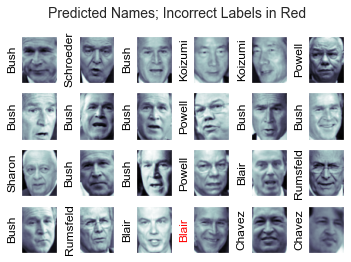

In [141]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [144]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



## <font color='teal'> 6. Let's generate images with Gaussian Mixture Models </font>

Let's dowload the dataset for digits and display the first 100. We have nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more.

dataset shape (1797, 64)


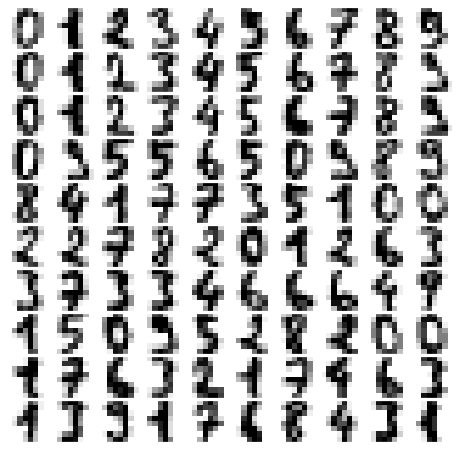

In [147]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
digits = load_digits()
print("dataset shape {}".format(digits.data.shape))
plot_digits(digits.data)

Now we will use PCA to transform our data and make it work with GMM. The result is 41 dimensions, a reduction of nearly 1/3 preserving 99% of the infomation.

In [149]:
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
print("dataset shape {}".format(data.shape))

dataset shape (1797, 41)


### <font color='teal'> 6.1 Find the ideal number of clusters to classify the data</font>
As mentioned on the class the most common way to find the optimal number of clusters is by using the elbow criterion. To do this you need to test out the model for several cluster sizes, be sure to try at least 200 clusters. The to know how good it will be we will use the Akaike information criterion. The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.
$${\displaystyle {\mathit {AIC}}=2k-2\ln(L)}$$
For this you'll create a list with all the models (a model per number of cluster) and a list of their respectives AICs.

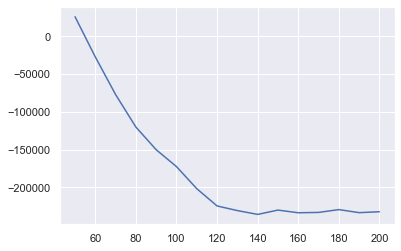

In [162]:
n_components = np.arange(50, 210, 10)
models = None # Create a list of models and fit them to the data
aics = None  # Create a with the respective AICs for each model
plt.plot(n_components, aics)

### <font color='teal'> 6.2 Choose the ideal model and fit it to the data</font>

In [163]:
gmm = GaussianMixture(None, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_) #check whether it had converged 

True


### <font color='teal'> 6.3 Now generate data from your mixture model and recover real digits</font>
As the gaussian mixture model is defined by a distribution of probability, then you can generate values from this distributions using methods as montecarlo. To generate the data you can see how to generate samples with sklearn. However if you want to practice your montecarlo skills I suggest you to generate them directly by hand. 

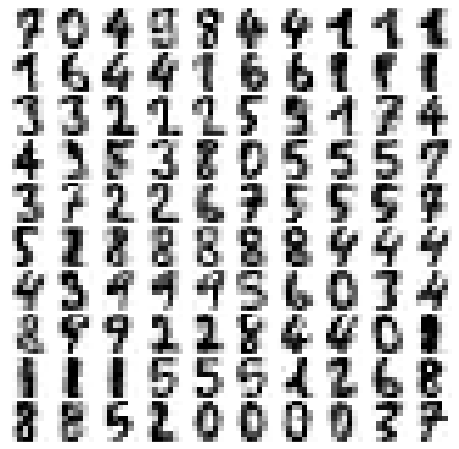

In [164]:
data_new = None 
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)